In [60]:
import vitaldb
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [4]:
# colorblind friendly palette
import matplotlib as mpl
cp = ["#172A5A", "#FF7171", "#227567", "#34BAEA", "#F9D466", ]
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=cp)

# set default font
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Open Sans', 'Arial']


In [31]:
track_names = ['ECG_II', 'ART', 'PLETH']
caseids = vitaldb.find_cases(track_names)
cid = caseids[0]

print('tracks:', track_names)
print('found', len(caseids), 'case ids')
print('case id:', cid)

vf = vitaldb.VitalFile(cid, track_names)

fs = 100
data = vf.to_numpy(track_names, 1/fs)
t = np.arange(data.shape[0]) / fs

ecg = data[:,0]
art = data[:,1]
ppg = data[:,2]


tracks: ['ECG_II', 'ART', 'PLETH']
found 3458 case ids
case id: 1


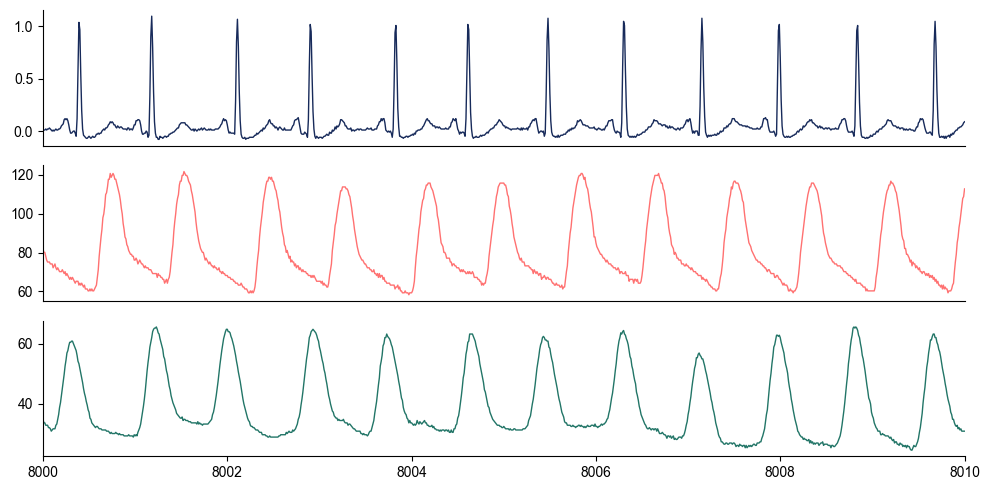

In [32]:
ta, tb = 8000, 8010
twin = (t >= ta) & (t <= tb)

plt.figure(figsize=(10,5))

plt.subplot(3,1,1)
plt.plot(t[twin], ecg[twin], lw=1, c=cp[0])
sns.despine(bottom=True)
plt.xticks([])
plt.xlim(ta, tb)

plt.subplot(3,1,2)
plt.plot(t[twin], art[twin], lw=1, c=cp[1])
sns.despine(bottom=True)
plt.xticks([])
plt.xlim(ta, tb)

plt.subplot(3,1,3)
plt.plot(t[twin], ppg[twin], lw=1, c=cp[2])
sns.despine()
# plt.xticks([])
plt.xlim(ta, tb)

plt.tight_layout()
plt.savefig('demo.pdf')
plt.show()


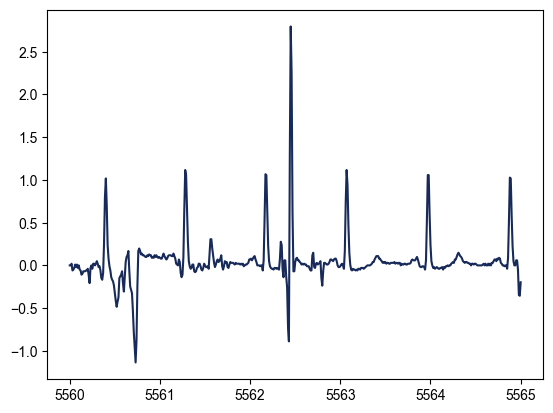

In [33]:
ta, tb = 5560, 5565
twin = (t >= ta) & (t <= tb)

plt.plot(t[twin], ecg[twin])

In [51]:
def plotSigRange(ind, ta, tb, fs):
    
    cid = caseids[ind]
    vf = vitaldb.VitalFile(cid, track_names)

    fs = 100
    data = vf.to_numpy(track_names, 1/fs)
    t = np.arange(data.shape[0]) / fs

    ecg = data[:,0]
    art = data[:,1]
    ppg = data[:,2]
    
    twin = (t >= ta) & (t <= tb)

    plt.figure(figsize=(10,5))

    plt.subplot(3,1,1)
    plt.plot(t[twin], ecg[twin], lw=1, c=cp[0])
    sns.despine(bottom=True)
    plt.xticks([])
    plt.xlim(ta, tb)

    plt.subplot(3,1,2)
    plt.plot(t[twin], art[twin], lw=1, c=cp[1])
    sns.despine(bottom=True)
    plt.xticks([])
    plt.xlim(ta, tb)

    plt.subplot(3,1,3)
    plt.plot(t[twin], ppg[twin], lw=1, c=cp[2])
    sns.despine()
    # plt.xticks([])
    plt.xlim(ta, tb)

    plt.tight_layout()
    plt.savefig('demo.pdf')
    plt.show()
    
    

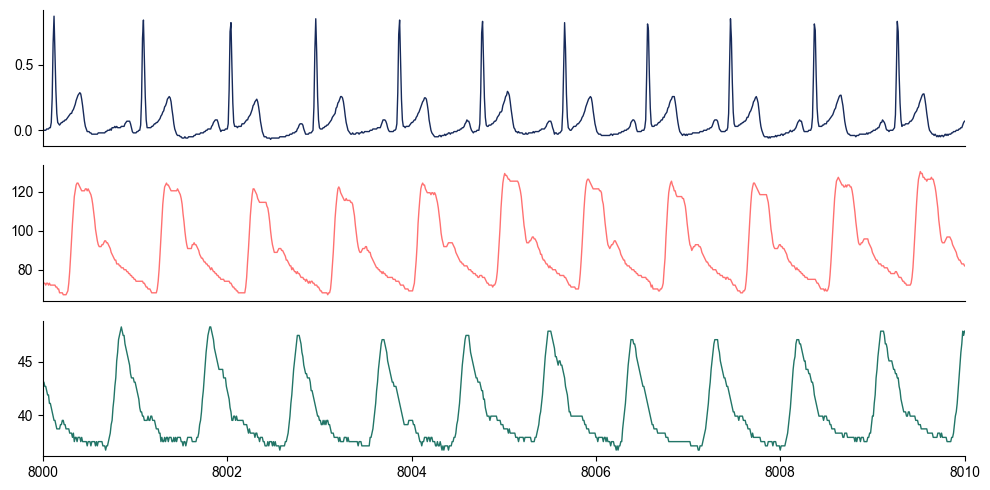

In [52]:
plotSigRange(45, 8000, 8010, fs)

In [61]:
def plotScanner(caseids):
    for i in range(len(caseids)):
        plotSigRange(i, 8000, 8010, fs)
        time.sleep(1)
        
        

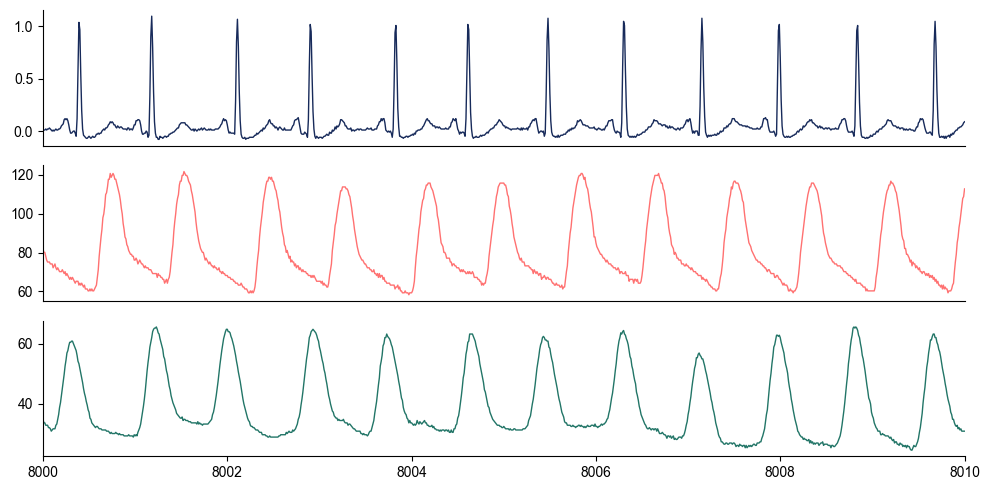

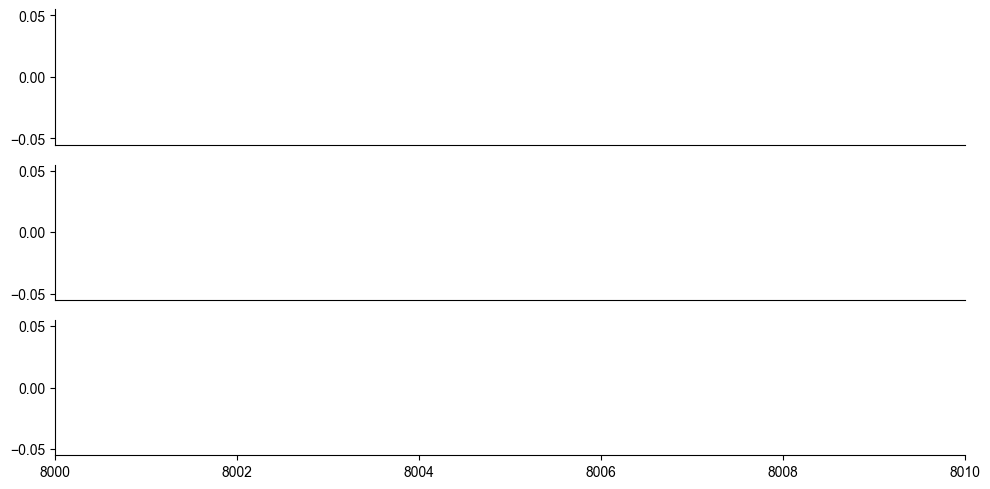

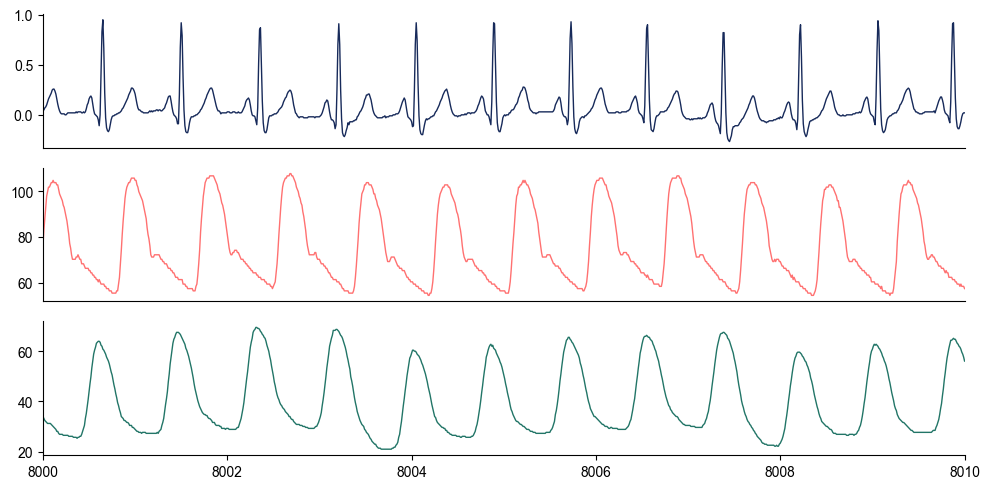

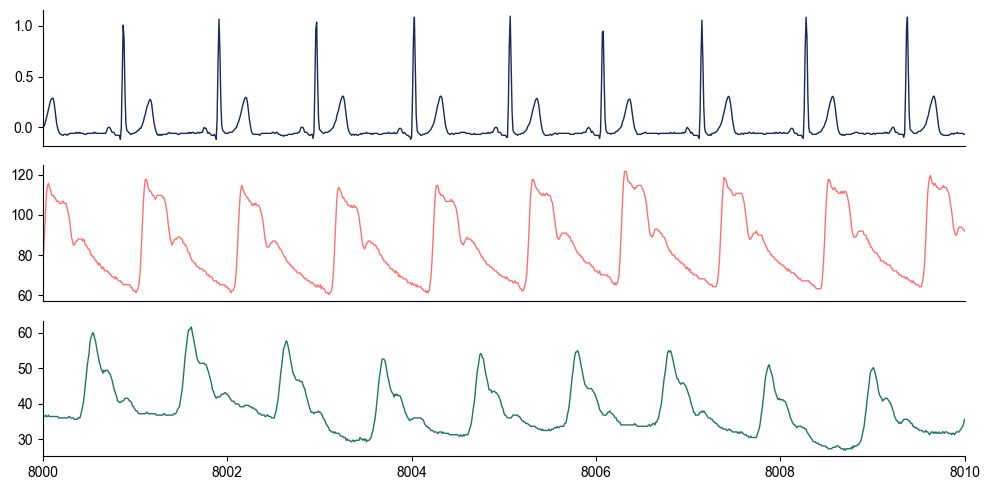

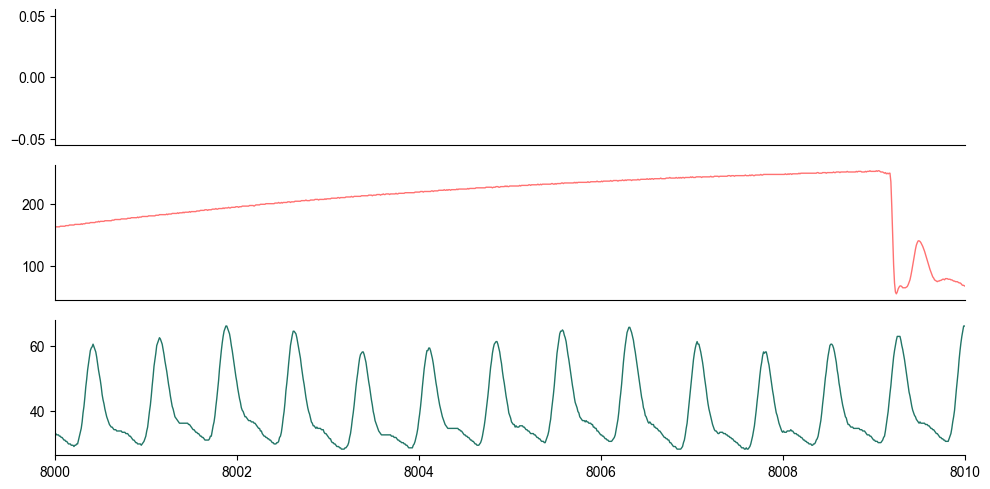

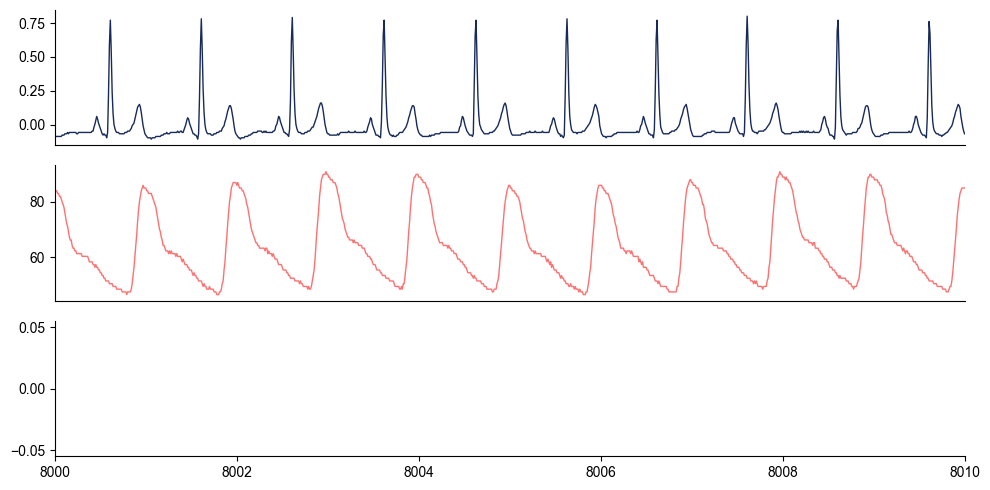

KeyboardInterrupt: 

In [62]:
plotScanner(caseids)